<a href="https://colab.research.google.com/github/negarhonarvar/Machine-Learning/blob/main/HW2_GradientDesecnt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initialization

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn import metrics
import matplotlib.pyplot as plt
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Experimenting on Data

in first step we need to check if our data has samples with missing values so we take care of the missings before continuing to next steps

In [ ]:
print(data['age'].isna().sum(), data['age'].unique())
print(data['sex'].isna().sum(), data['sex'].unique())
print(data['bmi'].isna().sum(), data['bmi'].unique())
print(data['children'].isna().sum(), data['children'].unique())
print(data['smoker'].isna().sum(), data['smoker'].unique())
print(data['region'].isna().sum(),data['region'].unique())
print(data['charges'].isna().sum(), data['charges'].unique())

0 [19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]
0 ['female' 'male']
0 [27.9   33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84
 26.22  26.29  34.4   39.82  42.13  24.6   30.78  23.845 40.3   35.3
 36.005 32.4   34.1   31.92  28.025 27.72  23.085 32.775 17.385 36.3
 35.6   26.315 28.6   28.31  36.4   20.425 32.965 20.8   36.67  39.9
 26.6   36.63  21.78  30.8   37.05  37.3   38.665 34.77  24.53  35.2
 35.625 33.63  28.    34.43  28.69  36.955 31.825 31.68  22.88  37.335
 27.36  33.66  24.7   25.935 22.42  28.9   39.1   36.19  23.98  24.75
 28.5   28.1   32.01  27.4   34.01  29.59  35.53  39.805 26.885 38.285
 37.62  41.23  34.8   22.895 31.16  27.2   26.98  39.49  24.795 31.3
 38.28  19.95  19.3   31.6   25.46  30.115 29.92  27.5   28.4   30.875
 27.94  35.09  29.7   35.72  32.205 28.595 49.06  27.17  23.37  37.1
 23.75  28.975 31.35  33.915 28.785 28.3   37.4   17.765 34.7   2

# Feature Engineering

clustring age data in 4 ranges

In [ ]:
for index, row in data.iterrows():
    if row['age'] < 20:
        data.at[index, 'age'] = 'teen'
    if row['age'] >= 20 and row['age'] < 40:
        data.at[index , 'age'] = 'young adults'
    if row['age'] >= 40 and row['age'] <60:
        data.at[index, 'age'] = 'adults'
    if row['age'] >= 60 :
        data.at[index, 'age'] = 'middle age adults'
data['age'].value_counts()

adults               550
young adults         537
teen                 137
middle age adults    114
Name: age, dtype: int64

changing 2 option variables to binary

In [ ]:
lblenc=LabelEncoder()
zero_one_valued = ['sex','smoker']
for col in zero_one_valued:
  data[col] = lblenc.fit_transform(data[col])
# for No and Rural its 0 and for yes and Urban is 1
data.head()

,age,sex,bmi,children,smoker,region,charges
0,teen,0,27.900,0,1,southwest,16884.92400
1,teen,1,33.770,1,0,southeast,1725.55230
2,young adults,1,33.000,3,0,southeast,4449.46200
3,young adults,1,22.705,0,0,northwest,21984.47061
4,young adults,1,28.880,0,0,northwest,3866.85520


OneHot Encoding region and age

In [ ]:
tmp = data
enc = OneHotEncoder(sparse=False)
age = enc.fit_transform(data[['age']])
enc_data1 = pd.DataFrame(age, columns=enc.get_feature_names_out(['age']))
tmp.drop(columns='age', inplace=True )

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
region = enc.fit_transform(data[['region']])
enc_data2 = pd.DataFrame(region, columns=enc.get_feature_names_out(['region']))
tmp.drop(columns='region', inplace=True )

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
OneHotData = tmp.join(enc_data1)
OneHotData = OneHotData.join(enc_data2)
OneHotData

,sex,bmi,children,smoker,charges,age_adults,age_middle age adults,age_teen,age_young adults,region_northeast,region_northwest,region_southeast,region_southwest
0,0,27.900,0,1,16884.92400,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1,33.770,1,0,1725.55230,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1,33.000,3,0,4449.46200,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1,22.705,0,0,21984.47061,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,1,28.880,0,0,3866.85520,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,1,30.970,3,0,10600.54830,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1334,0,31.920,0,0,2205.98080,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1335,0,36.850,0,0,1629.83350,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1336,0,25.800,0,0,2007.94500,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


Moving result to last column

In [ ]:
first_column = OneHotData.pop('charges')
OneHotData.insert(12, 'charges', first_column)
OneHotData

,sex,bmi,children,smoker,age_adults,age_middle age adults,age_teen,age_young adults,region_northeast,region_northwest,region_southeast,region_southwest,charges
0,0,27.900,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,16884.92400
1,1,33.770,1,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1725.55230
2,1,33.000,3,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,4449.46200
3,1,22.705,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,21984.47061
4,1,28.880,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3866.85520
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,1,30.970,3,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,10600.54830
1334,0,31.920,0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2205.98080
1335,0,36.850,0,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1629.83350
1336,0,25.800,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2007.94500


we shall normalize the data

In [ ]:
d = preprocessing.normalize(OneHotData.iloc[:,0:12])
scaled_df = pd.DataFrame(d, columns=OneHotData.iloc[:,0:12].columns)
scaled_df.insert(12, 'charges', first_column)
scaled_df

,sex,bmi,children,smoker,age_adults,age_middle age adults,age_teen,age_young adults,region_northeast,region_northwest,region_southeast,region_southwest,charges
0,0.000000,0.998079,0.000000,0.035773,0.000000,0.000000,0.035773,0.000000,0.000000,0.000000,0.000000,0.035773,16884.92400
1,0.029560,0.998251,0.029560,0.000000,0.000000,0.000000,0.029560,0.000000,0.000000,0.000000,0.029560,0.000000,1725.55230
2,0.030137,0.994535,0.090412,0.000000,0.000000,0.000000,0.000000,0.030137,0.000000,0.000000,0.030137,0.000000,4449.46200
3,0.043916,0.997103,0.000000,0.000000,0.000000,0.000000,0.000000,0.043916,0.000000,0.043916,0.000000,0.000000,21984.47061
4,0.034564,0.998206,0.000000,0.000000,0.000000,0.000000,0.000000,0.034564,0.000000,0.034564,0.000000,0.000000,3866.85520
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.032089,0.993802,0.096268,0.000000,0.032089,0.000000,0.000000,0.000000,0.000000,0.032089,0.000000,0.000000,10600.54830
1334,0.000000,0.999020,0.000000,0.000000,0.000000,0.000000,0.031298,0.000000,0.031298,0.000000,0.000000,0.000000,2205.98080
1335,0.000000,0.999264,0.000000,0.000000,0.000000,0.000000,0.027117,0.000000,0.000000,0.000000,0.027117,0.000000,1629.83350
1336,0.000000,0.998501,0.000000,0.000000,0.000000,0.000000,0.000000,0.038702,0.000000,0.000000,0.000000,0.038702,2007.94500


# Splitting Data

In [ ]:
x= scaled_df.iloc[:,0:12].values
y= scaled_df.iloc[:,12:13].values
# choose the test size based on scikit learn documantation
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [ ]:
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

# Implementation of Gradient Desecnt

In [ ]:
print(x_train.shape)
print(y_train.shape)

(1003, 12)
(1003,)


In [ ]:
# initialize w and b
w = np.random.randn(x_train.shape[1])
b = np.random.randn()
alpha = 0.03
print(w.shape)

(12,)


In [ ]:
def Cost(x , y , w , b):
  predict = np.dot(x,w)+b
  m = x_train.shape[0]
  cost = np.sum((predict - y)**2)/(2*m)
  return cost

In [ ]:
def gradient_descent (x , y , w_in , b_in) :
    predict = np.dot(x,w_in)+b_in
    m = x_train.shape[0]
    dj_dw = np.dot((predict-y),x)/m
    dj_db = np.sum(predict-y)/m
    return dj_dw,dj_db

In [ ]:
cost = []
for j in range(1000):
  # print(y_train.shape)
  cost.append(Cost(x_train , y_train , w ,b))
  dw,db = gradient_descent(x_train , y_train , w ,b)
  w -= alpha * dw
  b -= alpha * db

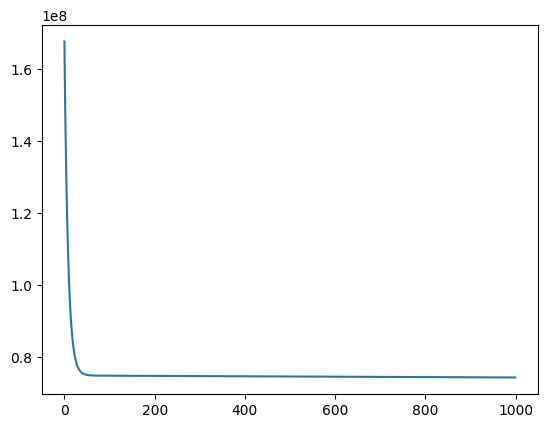

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1000), cost)

# Testing diffrent Split sizes

In [ ]:
pred = np.array(np.dot(x_train, w)+b)
pred.shape

(1003,)

In [ ]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, test_size=0.35)
x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, test_size=0.5)
x_train3, x_test3, y_train3, y_test3 = train_test_split(x, y, test_size=0.6)
x_train4, x_test4, y_train4, y_test4 = train_test_split(x, y, test_size=0.75)
x_train5, x_test5, y_train5, y_test5 = train_test_split(x, y, test_size=0.85)

In [ ]:
y_train1 = y_train1.reshape(-1)
y_test1 = y_test1.reshape(-1)
y_train2 = y_train2.reshape(-1)
y_test2 = y_test2.reshape(-1)
y_train3 = y_train3.reshape(-1)
y_test3 = y_test3.reshape(-1)
y_train4 = y_train4.reshape(-1)
y_test4 = y_test4.reshape(-1)
y_train5 = y_train5.reshape(-1)
y_test5 = y_test5.reshape(-1)

In [ ]:
w1 = np.random.randn(x_train1.shape[1])
w2 = np.random.randn(x_train2.shape[1])
w3 = np.random.randn(x_train3.shape[1])
w4 = np.random.randn(x_train4.shape[1])
w5 = np.random.randn(x_train5.shape[1])
cost1=[]
cost2=[]
cost3=[]
cost4=[]
cost5=[]
for _ in range(1000):
  # print(y_train.shape)
  cost1.append(Cost(x_train1 , y_train1 , w1 ,b))
  dw,db = gradient_descent(x_train1 , y_train1 , w1 ,b)
  w1 -= alpha * dw
  b -= alpha * db
  cost2.append(Cost(x_train2 , y_train2 , w2 ,b))
  dw,db = gradient_descent(x_train2 , y_train2 , w2 ,b)
  w2 -= alpha * dw
  b -= alpha * db
  cost3.append(Cost(x_train3 , y_train3 , w3 ,b))
  dw,db = gradient_descent(x_train3 , y_train3 , w3 ,b)
  w3 -= alpha * dw
  b -= alpha * db
  cost4.append(Cost(x_train4 , y_train4 , w4 ,b))
  dw,db = gradient_descent(x_train4 , y_train4 , w4 ,b)
  w4 -= alpha * dw
  b -= alpha * db
  cost5.append(Cost(x_train5 , y_train5 , w5 ,b))
  dw,db = gradient_descent(x_train5 , y_train5 , w5 ,b)
  w5 -= alpha * dw
  b -= alpha * db

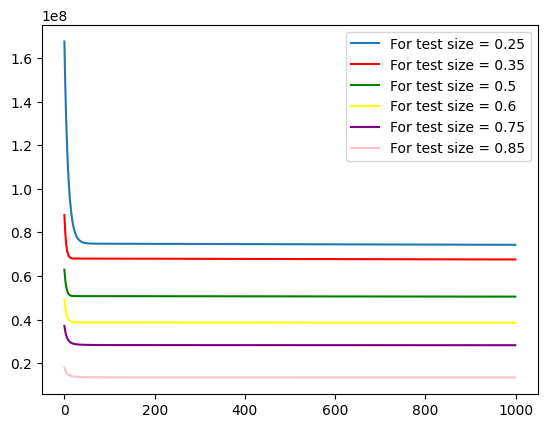

In [ ]:
# For test size =0.25
plt.plot(range(1000), cost,label = "For test size = 0.25")

# For test size =0.35
plt.plot(range(1000), cost1, color = 'r' , label ="For test size = 0.35")

# For test size =0.5
plt.plot(range(1000), cost2, color = 'g' , label = "For test size = 0.5")

# For test size =0.6
plt.plot(range(1000), cost3, color = 'yellow' , label ="For test size = 0.6")

# For test size =0.75
plt.plot(range(1000), cost4, color = 'purple' , label = "For test size = 0.75")

# For test size =0.85
plt.plot(range(1000), cost5 , color = 'pink' , label ="For test size = 0.85" )

plt.legend()
plt.show()

# Polynominal

Since the only paramether with values big enough to have an impact on polynominal is bmi , we shal consider bmi for our polynominal model

In [ ]:
scaled_df['Hyper_paramether'] = scaled_df['bmi']**2
scaled_df

,sex,bmi,children,smoker,age_adults,age_middle age adults,age_teen,age_young adults,region_northeast,region_northwest,region_southeast,region_southwest,charges,Hyper_paramether
0,0.000000,0.998079,0.000000,0.035773,0.000000,0.000000,0.035773,0.000000,0.000000,0.000000,0.000000,0.035773,16884.92400,0.996161
1,0.029560,0.998251,0.029560,0.000000,0.000000,0.000000,0.029560,0.000000,0.000000,0.000000,0.029560,0.000000,1725.55230,0.996505
2,0.030137,0.994535,0.090412,0.000000,0.000000,0.000000,0.000000,0.030137,0.000000,0.000000,0.030137,0.000000,4449.46200,0.989101
3,0.043916,0.997103,0.000000,0.000000,0.000000,0.000000,0.000000,0.043916,0.000000,0.043916,0.000000,0.000000,21984.47061,0.994214
4,0.034564,0.998206,0.000000,0.000000,0.000000,0.000000,0.000000,0.034564,0.000000,0.034564,0.000000,0.000000,3866.85520,0.996416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.032089,0.993802,0.096268,0.000000,0.032089,0.000000,0.000000,0.000000,0.000000,0.032089,0.000000,0.000000,10600.54830,0.987643
1334,0.000000,0.999020,0.000000,0.000000,0.000000,0.000000,0.031298,0.000000,0.031298,0.000000,0.000000,0.000000,2205.98080,0.998041
1335,0.000000,0.999264,0.000000,0.000000,0.000000,0.000000,0.027117,0.000000,0.000000,0.000000,0.027117,0.000000,1629.83350,0.998529
1336,0.000000,0.998501,0.000000,0.000000,0.000000,0.000000,0.000000,0.038702,0.000000,0.000000,0.000000,0.038702,2007.94500,0.997004


we need to insert this metric in its correct position and move charges column to the last column of dataframe

In [ ]:
first_column = scaled_df.pop('charges')
scaled_df.insert(13, 'charges', first_column)
scaled_df

,sex,bmi,children,smoker,age_adults,age_middle age adults,age_teen,age_young adults,region_northeast,region_northwest,region_southeast,region_southwest,Hyper_paramether,charges
0,0.000000,0.998079,0.000000,0.035773,0.000000,0.000000,0.035773,0.000000,0.000000,0.000000,0.000000,0.035773,0.996161,16884.92400
1,0.029560,0.998251,0.029560,0.000000,0.000000,0.000000,0.029560,0.000000,0.000000,0.000000,0.029560,0.000000,0.996505,1725.55230
2,0.030137,0.994535,0.090412,0.000000,0.000000,0.000000,0.000000,0.030137,0.000000,0.000000,0.030137,0.000000,0.989101,4449.46200
3,0.043916,0.997103,0.000000,0.000000,0.000000,0.000000,0.000000,0.043916,0.000000,0.043916,0.000000,0.000000,0.994214,21984.47061
4,0.034564,0.998206,0.000000,0.000000,0.000000,0.000000,0.000000,0.034564,0.000000,0.034564,0.000000,0.000000,0.996416,3866.85520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.032089,0.993802,0.096268,0.000000,0.032089,0.000000,0.000000,0.000000,0.000000,0.032089,0.000000,0.000000,0.987643,10600.54830
1334,0.000000,0.999020,0.000000,0.000000,0.000000,0.000000,0.031298,0.000000,0.031298,0.000000,0.000000,0.000000,0.998041,2205.98080
1335,0.000000,0.999264,0.000000,0.000000,0.000000,0.000000,0.027117,0.000000,0.000000,0.000000,0.027117,0.000000,0.998529,1629.83350
1336,0.000000,0.998501,0.000000,0.000000,0.000000,0.000000,0.000000,0.038702,0.000000,0.000000,0.000000,0.038702,0.997004,2007.94500


In [ ]:
x= scaled_df.iloc[:,0:13].values
y= scaled_df.iloc[:,13:14].values
# choose the test size based on scikit learn documantation
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

we define a loss function which is an error for each sample data

In [ ]:
loss = []
# initialize w and b
w = np.random.randn(x_train.shape[1])
b = np.random.randn()
loss.append(Cost(x_train , y_train , w ,b))

alpha = 0.01
print(w.shape)

tmp = []
for _ in range(10000):
    tmp.append(Cost(x_train, y_train, w, b))
    dw, db = gradient_descent(x_train, y_train, w, b)
    w -= alpha * dw
    b -= alpha * db
loss.append(tmp)

(13,)


we shall draw plots for each test size to compare the results

In [ ]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, test_size=0.35)
x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, test_size=0.5)
x_train3, x_test3, y_train3, y_test3 = train_test_split(x, y, test_size=0.6)
x_train4, x_test4, y_train4, y_test4 = train_test_split(x, y, test_size=0.75)
x_train5, x_test5, y_train5, y_test5 = train_test_split(x, y, test_size=0.85)

y_train1 = y_train1.reshape(-1)
y_test1 = y_test1.reshape(-1)
y_train2 = y_train2.reshape(-1)
y_test2 = y_test2.reshape(-1)
y_train3 = y_train3.reshape(-1)
y_test3 = y_test3.reshape(-1)
y_train4 = y_train4.reshape(-1)
y_test4 = y_test4.reshape(-1)
y_train5 = y_train5.reshape(-1)
y_test5 = y_test5.reshape(-1)

w1 = np.random.randn(x_train1.shape[1])
w2 = np.random.randn(x_train2.shape[1])
w3 = np.random.randn(x_train3.shape[1])
w4 = np.random.randn(x_train4.shape[1])
w5 = np.random.randn(x_train5.shape[1])
cost1=[]
cost2=[]
cost3=[]
cost4=[]
cost5=[]
for _ in range(1000):
  # print(y_train.shape)
  cost1.append(Cost(x_train1 , y_train1 , w1 ,b))
  dw,db = gradient_descent(x_train1 , y_train1 , w1 ,b)
  w1 -= alpha * dw
  b -= alpha * db
  cost2.append(Cost(x_train2 , y_train2 , w2 ,b))
  dw,db = gradient_descent(x_train2 , y_train2 , w2 ,b)
  w2 -= alpha * dw
  b -= alpha * db
  cost3.append(Cost(x_train3 , y_train3 , w3 ,b))
  dw,db = gradient_descent(x_train3 , y_train3 , w3 ,b)
  w3 -= alpha * dw
  b -= alpha * db
  cost4.append(Cost(x_train4 , y_train4 , w4 ,b))
  dw,db = gradient_descent(x_train4 , y_train4 , w4 ,b)
  w4 -= alpha * dw
  b -= alpha * db
  cost5.append(Cost(x_train5 , y_train5 , w5 ,b))
  dw,db = gradient_descent(x_train5 , y_train5 , w5 ,b)
  w5 -= alpha * dw
  b -= alpha * db

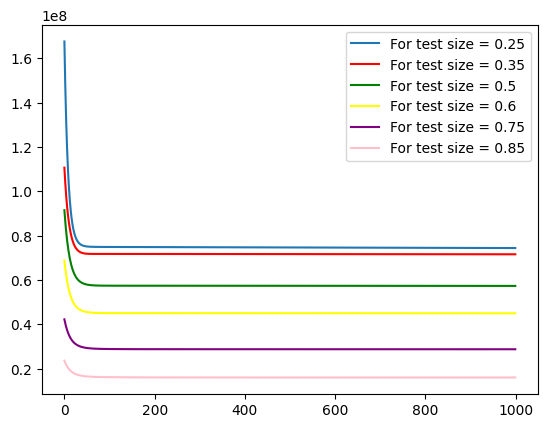

In [ ]:
# For test size =0.25
plt.plot(range(1000), cost,label = "For test size = 0.25")

# For test size =0.35
plt.plot(range(1000), cost1, color = 'r' , label ="For test size = 0.35")

# For test size =0.5
plt.plot(range(1000), cost2, color = 'g' , label = "For test size = 0.5")

# For test size =0.6
plt.plot(range(1000), cost3, color = 'yellow' , label ="For test size = 0.6")

# For test size =0.75
plt.plot(range(1000), cost4, color = 'purple' , label = "For test size = 0.75")

# For test size =0.85
plt.plot(range(1000), cost5 , color = 'pink' , label ="For test size = 0.85" )

plt.legend()
plt.show()